In [1]:
import requests

In [2]:
url = ('http://newsapi.org/v2/top-headlines?'
       'country=us&'
       'apiKey=4b55f36f7bc147b28747111e758d309f')
response = requests.get(url)

In [3]:
response.status_code

200

In [6]:
resp = response.json()

In [7]:
resp.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [8]:
resp['totalResults']

38

In [9]:
resp['articles']

[{'source': {'id': None, 'name': 'CNBC'},
  'author': 'Silvia Amaro',
  'title': 'European Central Bank keeps rates and stimulus program unchanged, despite stronger euro - CNBC',
  'description': "The euro, which is closely watched by the central bank, has\xa0risen over 5% against the the dollar since the start of July and hit a session high after the ECB's decision.",
  'url': 'https://www.cnbc.com/2020/09/10/ecb-rate-decision-and-economic-forecasts-september-2020.html',
  'urlToImage': 'https://image.cnbcfm.com/api/v1/image/106354120-1579884106653rts2zk7p.jpg?v=1579884172',
  'publishedAt': '2020-09-10T11:46:00Z',
  'content': 'The European Central Bank announced Thursday it was keeping its interest rates and coronavirus-stimulus program unchanged, despite a stronger euro putting pressure on the policymakers.\r\nThe euro, whi… [+1544 chars]'},
 {'source': {'id': None, 'name': 'BBC News'},
  'author': 'https://www.facebook.com/bbcnews',
  'title': "Belarus opposition politician told s

In [10]:
for i in resp['articles']:
    print(i.get("content"))

The European Central Bank announced Thursday it was keeping its interest rates and coronavirus-stimulus program unchanged, despite a stronger euro putting pressure on the policymakers.
The euro, whi… [+1544 chars]
None
The explosion leveled much of the port and sent a powerful shock wave through residential neighborhoods, shattering windows and doors. More than 190 people were killed and 6,000 wounded.
The extent … [+616 chars]
NEW YORK — It’s never been a particular career goal of Serena Williams to be alongside Molla Bjorsted Mallory in the U.S. Open record book, but after 20 years and 106 victories she is on the cusp of … [+4114 chars]
Copenhagen, Denmark — A far-right Norwegian lawmaker said Wednesday that he has nominated President Donald Trump for the Nobel Peace Prize for his efforts in the Middle East.
Christian Tybring-Gjedd… [+2617 chars]
It’s finally here. Football is finally here. Today we will start the long-awaited Week 1 of the NFL 2020 season, and it couldn’t have come 

In [13]:
f = open("news.txt",'w')

In [14]:
f.write(resp['articles'][0]['content'])

214

In [15]:
f.close()

In [17]:
for i in resp['articles']:
    if i.get("content"):
        if "corona" in i.get("content").lower() or "covid-19" in i.get("content").lower():
            print(i['content'])

The European Central Bank announced Thursday it was keeping its interest rates and coronavirus-stimulus program unchanged, despite a stronger euro putting pressure on the policymakers.
The euro, whi… [+1544 chars]
ZURICH/FRANKFURT (Reuters) - AstraZeneca should still know before the end of the year whether its experimental vaccine protects people against COVID-19, the drugmaker’s chief executive Pascal Soriot … [+2140 chars]
Pfizer(NYSE:PFE) hasn't been bashful about playing up the prospects for its coronavirus vaccine candidate, BNT162b2, co-developed with BioNTech(NASDAQ:BNTX). The company even predicted that it would … [+3654 chars]
Photo illustration by Slate. Photos by Getty Images Plus.
This is part of Six Months In, a Slate series reflecting on half a year of coronavirus lockdown in America.
Were living through the first d… [+12987 chars]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/covid_19_data.csv")

In [21]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.groupby("Country/Region").agg({"Confirmed":np.sum,"Deaths":np.sum,"Recovered":np.sum}).sort_values(by="Confirmed",ascending=False)['Confirmed'][:10]

Country/Region
US        396234081.0
Brazil    194933354.0
India     122656809.0
Russia     75257596.0
Spain      38921479.0
UK         37857807.0
Peru       35981065.0
Italy      35112643.0
Mexico     31500257.0
Iran       30414143.0
Name: Confirmed, dtype: float64

In [30]:
df.groupby("Country/Region").agg({"Confirmed":np.sum,"Deaths":np.sum,"Recovered":np.sum}).sort_values(by="Deaths",ascending=False)['Deaths'][:10]

Country/Region
US        16373394.0
Brazil     7403667.0
UK         5398648.0
Italy      4872239.0
France     4051434.0
Spain      3978566.0
Mexico     3531603.0
India      2703456.0
Iran       1651912.0
Peru       1428666.0
Name: Deaths, dtype: float64

In [31]:
df.groupby("Country/Region").agg({"Confirmed":np.sum,"Deaths":np.sum,"Recovered":np.sum}).sort_values(by="Recovered",ascending=False)['Recovered'][:10]

Country/Region
Brazil     138263751.0
US         114488854.0
India       82585555.0
Russia      48625808.0
Iran        24785578.0
Chile       24721290.0
Mexico      24466370.0
Germany     23733292.0
Italy       22375607.0
Peru        22337477.0
Name: Recovered, dtype: float64

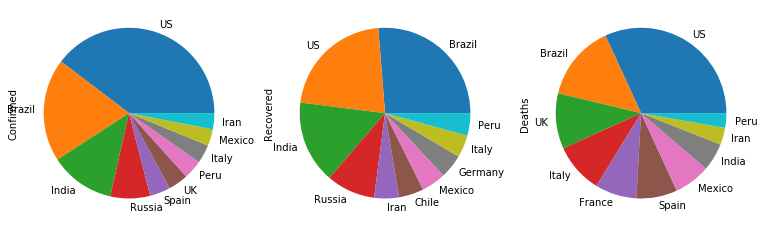

In [9]:
df = pd.read_csv("../datasets/covid_19_data.csv")
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
df.groupby("Country/Region").sum().sort_values(by="Confirmed",ascending=False)['Confirmed'][:10].plot(kind="pie",ax=ax1)
df.groupby("Country/Region").sum().sort_values(by="Recovered",ascending=False)['Recovered'][:10].plot(kind="pie",ax=ax2)
df.groupby("Country/Region").sum().sort_values(by="Deaths",ascending=False)['Deaths'][:10].plot(kind="pie",ax=ax3)